<h1><center>Project MAA106: approximation of periodic functions</center></h1>

<h2><center> Authors: Dain Jung & Vrushank Agrawal (Group 3) </centr></h2>

## Table of contents

- [Section 1: Fourier Series](#section1)
- [Section 2: Trigonometric Interpolation](#section2)
- [Section 3: Some Applications](#Section3)

In [11]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
from scipy import integrate
from scipy import fftpack

import warnings
warnings.filterwarnings('ignore')

<a id="section1"></a>
**<h1> Section 1: Fourier Series </h1>**

### Table of contents

1.1 [Background](#1.1)<br>
1.2 [Observations](#1.2)<br>
$\quad$1.2.1 [Calculating Fourier Coefficeints](#1.2.1)<br>
$\quad$1.2.2 [Method to compute Fourier Coefficeints](#1.2.2)<br>
$\quad$1.2.3 [Decay of Fourier Coefficeints](#1.2.3)<br>

<a id="1.1"></a>
**<h2>1.1 Background </h2>**
Given a 2$\pi$-periodic function f: $\mathbb{R} \rightarrow \mathbb{R}$, its Fourier series S(f) is defined by 

**$$ S(f)(x) = a_0 (f) + 2\sum_{n=1}^{\infty} (a_n(f)cos(nx) + b_n(f)sin(nx)) $$**

where the Fourier coefficients $a_n(f)$ and $b_n(f)$ are given by 

**$$ a_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)cos(nx) \,dx \\, \\ b_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)sin(nx) \, dx $$**

<a id="1.2"></a>
**<h2> 1.2 Observations </h2>**

<a id="1.2.1"></a>
**<h3> 1.2.1: Calculating fourier coefficeints for f and g </h3>**

We will compute by hands the Fourier coefficients of $f(x)$ and $g(x)$ by hand. As it was stated in the background, 
$$a_{n}(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)cos(nx) \,dx $$ and $$b_{n}(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)sin(nx) \,dx $$ 

Let us first compute the Fourier coefficients of the function $f$. Since $f$ is an even function considering that $f(-x)=f(x)$, 
$$a_{n}(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x) cos(nx) \,dx$$ and $b_{n}(f)=0$. 

Thus, $$a_{n}(f)= \frac{1}{\pi} \int_{0}^{\pi} f(x) cos(nx) \,dx = \frac{1}{\pi}(\int_{0}^{\frac{\pi}{2}}cos(nx)\,dx-\int_{\frac{\pi}{2}}^{\pi}cos(nx)\,dx)$$ 
Then, $$a_{n}(f) = [\frac{sin(nx)}{n}]_{0}^{\frac{\pi}{2}} - [\frac{sin(nx)}{n}]_{\frac{\pi}{2}}^{\pi} = \frac{1}{\pi}(\frac{2sin(\frac{\pi}{2}n)}{n})$$

Now let us compute Fourier coefficients of $g$. 
As well as function $f$, function $g$ is also an even function: 
$$g(-x) = 1-\frac{2\lvert -x \rvert}{\pi} = 1-\frac{2\lvert x \rvert}{\pi} = g(x)$$ 

Therefore, $$b_{n}(g) = 0 \quad \textrm{and} \quad a_{n}(f) = \frac{1}{\pi} \int_{0}^{\pi} g(x) cos(nx) \,dx$$ 

Let us compute $a_{n}(g)$.
$$a_{n}(g) = \frac{1}{\pi} \int_{0}^{\pi} g(x) cos(nx) \,dx = \frac{1}{\pi} \int_{0}^{\pi} (1-\frac{2\lvert x \rvert}{\pi}) cos(nx) \,dx$$

Using the integral by part, 
$$a_{n}(g) = \frac{1}{\pi} (0-\frac{2}{\pi}([\lvert x \rvert \frac{sin(nx)}{n}]_{0}^{\pi} - \int_{0}^{\pi} (\frac{sin(nx)}{n}) \, dx)) = -\frac{2}{(\pi n)^2}((-1)^n-1)$$

In the cell below, we define and plot the functions f and g resepctively, which will be evaluated further in the document.

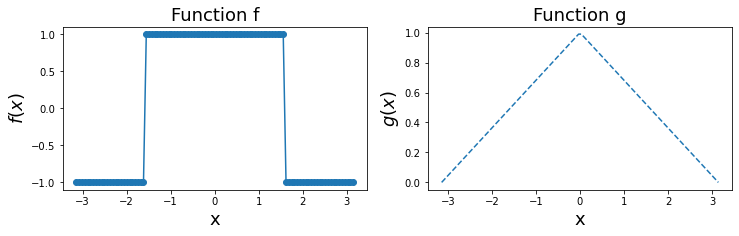

In [12]:
def func_f(x):
    return 1 if x <= np.pi/2 and x >= -np.pi/2 else -1

x = np.linspace(-np.pi, np.pi, 100)
f_x = [ func_f(i) for i in x]

#Plot the function f
fig = plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.plot(x, f_x, marker="o")
plt.xlabel('x', fontsize=18)
plt.ylabel('$f(x)$', fontsize=18)
plt.title('Function f', fontsize=18)

#Plot the function g
plt.subplot(122)
plt.plot(x, 1-np.abs(x)/np.pi, "--")
plt.xlabel('x', fontsize=18)
plt.ylabel('$g(x)$', fontsize=18)
plt.title('Function g', fontsize=18)

plt.show()

<a id="1.2.2"></a>
**<h3> 1.2.2: Method to compute Fourier Coefficients </h3>**

In the cells below, we have defined the functions to numerically calculate the truncated fourier series of an even 2$\pi$-periodic function. These python functions will be used to analyze the functions $f$ and $g$ in the subsequent subsection.

In [13]:
def a_nf(n): 
    """
    Function to return the value a_n(f) depends on the value of n.
    -----------------------
    Inputs: 
    n: any natural number 
    
    Output: 
    a_n(f) : Fourier coefficient of function f 
    """
    return 2*np.sin(n*np.pi/2)/n

def a_ng(n): 
    """
    Function to return the value a_n(g) depends on the value of n.
    -----------------------
    Inputs: 
    n: any natural number 
    
    Output: 
    a_n(g) : Fourier coefficient of function g
    """
    return (-1+(-1)**n)*(-2/(np.pi*n)**2)

In [14]:
def anf(n): 
    x = lambda x: np.cos(n*x)
    x_1 = lambda x: -np.cos(n*x)
    return 1/np.pi * scipy.integrate.quad(x, 0, np.pi/2)[0] + 1/np.pi * scipy.integrate.quad(x_1, np.pi/2, np.pi)[0]

def ang(n): 
    x = lambda x: (1-2*np.abs(x)/np.pi)*np.cos(n*x)
    return 1/np.pi * scipy.integrate.quad(x, 0, np.pi)[0]

<a id="1.2.3"></a>
**<h3> 1.2.3: Decay of Fourier Coefficients </h3>**

As suggested, we will study the decay of Fourier coefficients of functions with different regularity, and the error between the functions and their truncated Fourier series. 

Here, we will study the functions $f$ and $g$ that were introduced earlier. Since we showed that these functions are even functions, $b_n(f) = b_n(g) = 0$, while $a_n(f)$ and $a_n(g)$ are given by:

$$a_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)cos(nx) \,dx $$ 
$$a_n(g) = \frac{1}{\pi} \int_{0}^{\pi} g(x)cos(nx) \,dx $$ 

Moreover, the trunacated Fourier series for functions $f$ and $g$ are respectively given by the trigonometric polynomial: $$ S_N(f)(x) = a_0(f) + 2\sum_{n=1}^{N-1} a_n(f)cos(nx)$$, $$S_N(g)(x) = a_0(f) + 2\sum_{n=1}^{N-1} a_n(g)cos(nx)$$
Below, we first analyze the decay of their Fourier coefficients.

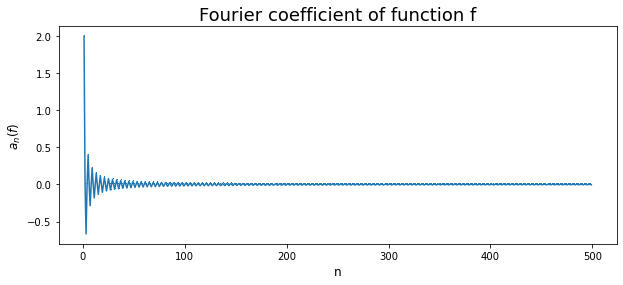

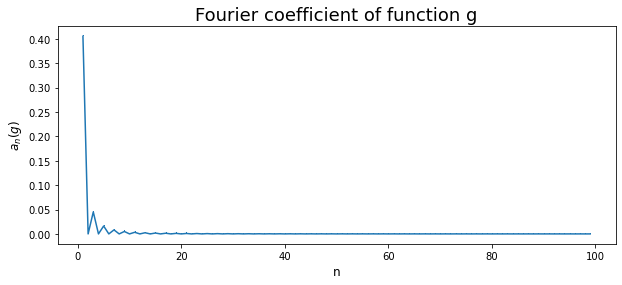

In [15]:
# Decay of Fourier cofficient of function f as n goes to infinity 
N = np.arange(0, 500, 1)
coeff_anf = a_nf(N)

# Decay of Fourier cofficient of function g as n goes to infinity 
N_1 = np.arange(0, 100, 1)
y_1 = a_ng(N_1)

fig = plt.figure(figsize=(10, 4))
plt.plot(N, coeff_anf, marker=",")
plt.xlabel('n', fontsize=12)
plt.ylabel('$a_{n}(f)$', fontsize=12)
plt.title('Fourier coefficient of function f', fontsize=18)

fig = plt.figure(figsize=(10, 4))
plt.plot(N_1, y_1, marker=",")
plt.xlabel('n', fontsize=12)
plt.ylabel('$a_{n}(g)$', fontsize=12)
plt.title('Fourier coefficient of function g', fontsize=18)
plt.show()

As the plots above show, as n increases, the Fourier coefficient for both functions converges to 0 as it was suggested in the background theory.

Now, let us study the error between the function and its truncated Fourier series in the next cell.

In [16]:
def Sn_f(N, x):
    """
    Function to return the value Sn_(f) depends on the value of N.
    -----------------------
    Inputs: 
    N: Maximum order of sequence 
    x: Variable of the function  
    
    Output: 
    Sn_(f) : Fourier series of function f
    """
    partial_sum = anf(0)
    for n in range(1, N, 1):
        partial_sum += 2 * anf(n) * np.cos(n * x)
    return partial_sum

def Sn_g(N,x): 
    """
    Function to return the value Sn_(g) depends on the value of N.
    -----------------------
    Inputs: 
    N: Maximum order of sequence 
    x: Variable of the function  
    
    Output: 
    Sn_(g) : Fourier series of function g
    """
    partial_sum = ang(0)
    for n in range(1, N, 1): 
        partial_sum += 2 * ang(n) * np.cos(n * x)
    return partial_sum 


def f(x): 
    return 1 if -np.pi/2 <= x <= np.pi/2 else -1

def g(x):
    return 1 - (2*np.abs(x)/np.pi)

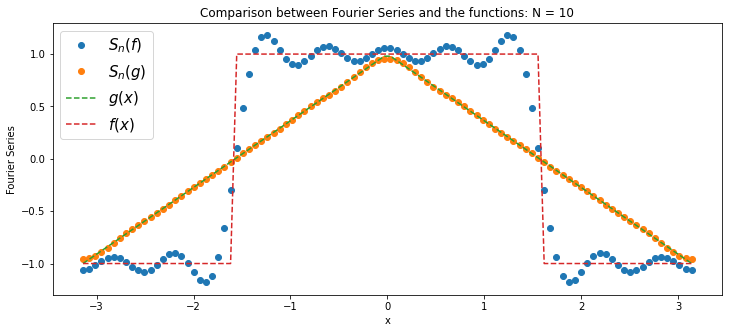

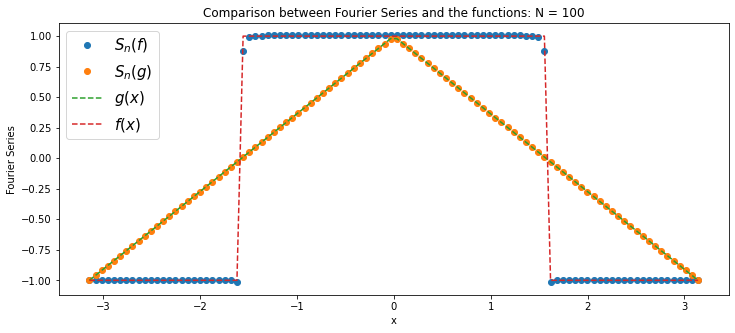

In [17]:
# Defined N to compare Fourier series and original function. 
N = 10
X = np.linspace(-np.pi, np.pi, 100)
y_f = [f(x) for x in X]

plt.figure(figsize=(12, 5))
plt.plot(X, Sn_f(N,X), marker='o', linestyle='', label= '$S_{n}(f)$')
plt.plot(X, Sn_g(N,X), marker = 'o', linestyle='', label = '$S_{n}(g)$')
plt.plot(X, g(X), '--', label = '$g(x)$')
plt.plot(X, y_f, '--', label = '$f(x)$')
plt.xlabel('x')
plt.ylabel('Fourier Series')
plt.legend(fontsize=15, loc='upper left')
plt.title('Comparison between Fourier Series and the functions: N = 10')

# Vary N to show the impact of N on comparison between Frourier series and its original function. 
N_1 = 100
plt.figure(figsize=(12, 5))
plt.plot(X, Sn_f(N_1,X), marker='o', linestyle='', label= '$S_{n}(f)$')
plt.plot(X, Sn_g(N_1,X), marker = 'o', linestyle='', label = '$S_{n}(g)$')
plt.plot(X, g(X), '--', label = '$g(x)$')
plt.plot(X, y_f, '--', label = '$f(x)$')
plt.xlabel('x')
plt.ylabel('Fourier Series')
plt.legend(fontsize=15, loc='upper left')
plt.title('Comparison between Fourier Series and the functions: N = 100')
plt.show()

Now, from the graph above, let us show the decay of error between the function and its truncated Fourier series as N increases. 

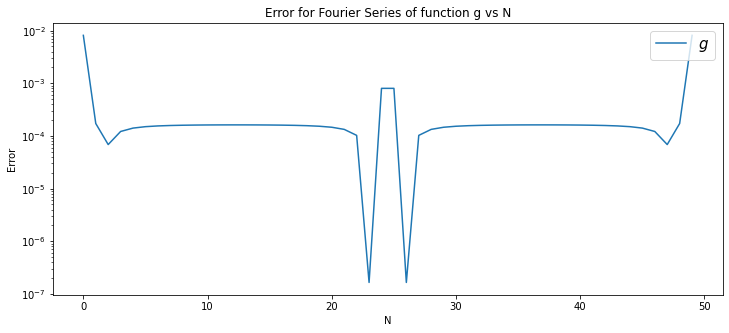

In [18]:
# Variation of error of Fourier series and function g depends on the value of N 
x = np.linspace(-np.pi, np.pi,50)
N = np.arange(0, 50,1)
err_g = np.abs(g(x)-Sn_g(len(N),x))
tabN_g = np.arange(0, err_g.size)

plt.figure(figsize=(12, 5))
plt.plot(tabN_g, err_g, label = '$g$')
plt.xlabel('N')
plt.ylabel('Error')
plt.yscale('log')
plt.legend(fontsize=15, loc='upper right')
plt.title('Error for Fourier Series of function g vs N')
plt.show()

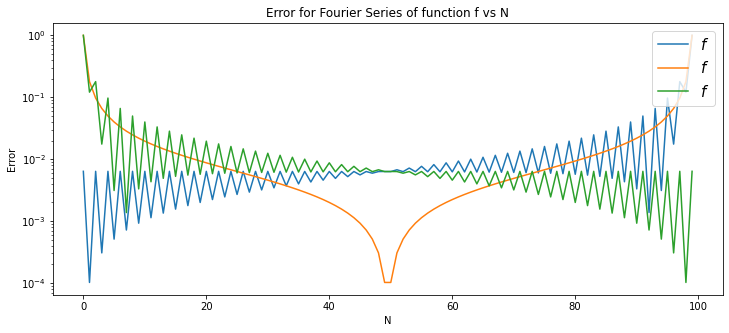

In [19]:
# Variation of error of Fourier series and function f depends on the value of N 
x1 = np.linspace(-np.pi, -np.pi/2,100)
x2 = np.linspace(-np.pi/2, np.pi/2, 100)
x3 = np.linspace(np.pi/2, np.pi, 100)

N = np.arange(0, 100,1)

err_f1 = np.abs(-1-Sn_f(len(N),x1))
err_f2 = np.abs(1-Sn_f(len(N), x2))
err_f3 = np.abs(-1-Sn_f(len(N), x3))

tabN_f1 = np.arange(0, err_f1.size)
tabN_f2 = np.arange(0, err_f2.size)
tabN_f3 = np.arange(0, err_f3.size)

plt.figure(figsize=(12, 5))
plt.plot(tabN_f1, err_f1,  label = '$f$')
plt.plot(tabN_f2, err_f2,  label = '$f$')
plt.plot(tabN_f3, err_f3,  label = '$f$')
plt.xlabel('N')
plt.ylabel('Error')
plt.yscale('log')
plt.legend(fontsize=15, loc='upper right')
plt.title('Error for Fourier Series of function f vs N')

plt.show()

The graphs above show the relation of the error between the Fourier series and function and N. They are symmetrical over the midpoint of horizontal axis (N).

In the cell below, we attempt to study quantitatively the decay rate of the Fourier Coefficients for the functions $f$ and $g$ versus their regularity.

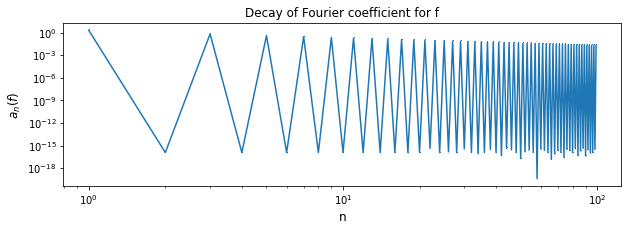

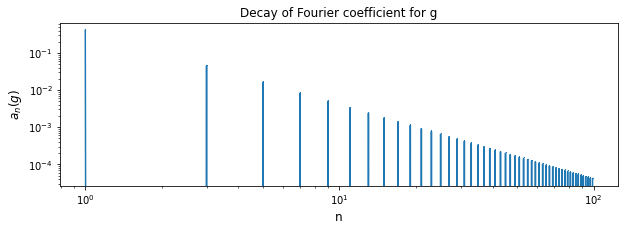

In [20]:
# Decay of Fourier cofficient of function f as n goes to infinity 
N = np.arange(0, 100, 1)
coeff_anf = [np.abs(a_nf(i)) for i in N]

# Decay of Fourier cofficient of function g as n goes to infinity 
y_1 = [np.abs(a_ng(i)) for i in N]

fig = plt.figure(figsize=(10, 3))
plt.loglog(N, coeff_anf, marker=",")
plt.xlabel('n', fontsize=12)
plt.ylabel('$a_{n}(f)$', fontsize=12)
plt.title('Decay of Fourier coefficient for f', fontsize=12)

fig = plt.figure(figsize=(10, 3))
plt.loglog(N, y_1, marker=",")
plt.xlabel('n', fontsize=12)
plt.ylabel('$a_{n}(g)$', fontsize=12)
plt.title('Decay of Fourier coefficient for g', fontsize=12)
plt.show()

**Observations**

We use the functions defined in section 1.2.2 and plot them on loglog scale to study the rate of convergence of the fourier coefficients. 

It is apparent from the two plotted graphs that smoother the function is, faster is the decay rate of the fourier coefficeints. Moreover, we can use the power law form (given by $ y(x) = k x^{\alpha} $, where k is a constant and $ \alpha $ is the decay rate) and on careful evaluation, it can be observed that the decay rate $ \alpha $ for functions $f$ and $G$ are roughly given by:
$$
\alpha_f = -1 \quad \textrm{and} \quad \alpha_g = -2
$$

<a id="section2"></a>
**<h1> Section 2 - Trigonometric Interpolation </h1>**

### Table of contents

2.1 [Background](#2.1)<br>
2.2 [Observations](#2.2)<br>
$\quad$2.2.1 [Method 1](#2.2.1)<br>
$\quad$2.2.2 [Method 2](#2.2.2)<br>
$\quad$2.2.3 [Method 3](#2.2.3)<br>
$\quad$2.2.4 [Run-Time Comparison](#2.2.4)<br>
2.3 [Conclusion](#2.3)

<a id='2.1'></a>
**<h2> 2.1 Background </h2>**

We denote the unique trigonometric polynomial of degree N-1 of a 2$\pi$ periodic and even function $f$ by: $$P_N(f)(x) = \hat{f_0} + 2 \sum_{n = 1}^{N-1} \hat{f_n}cos(nx) $$

where we fix some integer $N > 0$ and define $X_k$ as:  $$X_k = \frac {2k + 1}{2N} \pi, \quad k = 0,..., N-1$$

such that $$ P_N(f)(X_k) = f(X_k) \quad \forall k = 0,...,N-1. $$

We also define the following notations, where $\hat{f} \in \mathbb{R}^N $ is the vector of coefficients of $P_N(f)$, and $ f(X) \in \mathbb{R}^N $ is the vector of values of $f$ at the points $X_k$ :
$$ 
\hat{f} = \begin{pmatrix} \hat{f_0} \\ \vdots \\ \hat{f_{N-1}} \end{pmatrix} \quad \textrm{and} \quad f(X) = \begin{pmatrix} f(X_0) \\ \vdots \\ f(X_{N-1}) \end{pmatrix}
$$

We will use this information to study the subsections mentioned hereafter.

<a id='2.2'></a>
**<h2> 2.2 Observations </h2>**

The goal of the analysis is to find the coefficients of the polynomial $P_N(f)$ in the form of vector $\hat{f}$. To do this, we will evaluate $\hat{f}$ for a function $f$ using three different methods expained in each of the three subsections. Thereafter, the performance of the three methods will be compared using the function %timeit in subsection 2.2.4 from which appropriate conclusions are drawn.

<a id='2.2.1'></a>
**<h3> 2.2.1: Method 1</h3>**

We write the problem as a linear system given by $A\hat{f} = f(X)$, where $A$ is a $N \times N$ matrix to be determined. In our approach, we will first determine the matrix A, and the vector $f(X_k)$ for the function $f$. Then we will evaluate the vector $\hat{f}$ using <b>scipy.linalg.solve</b> and plot the coefficients of the vector to study how they behave. 

For our analysis in this subsection, all the 2$\pi$-periodic even functions used are defined below.

In [21]:
# function g1
def g1(x, pow = 1):
    """
    Analysis function g1
    -----------------------
    Inputs: 
    X : the sample point
    
    Output: 
    (float value) : the value |x^3| % (2π)
    """
    return (np.abs(x) % (2 * np.pi))

# function g2
def g2(x):
    """
    Analysis function g2
    -----------------------
    Inputs: 
    X : the sample point
    
    Output: 
    (float value) : the value cos(3 * x)
    """
    return np.cos(3 * x)

# function g3
def g3(x):
    """
    Analysis function g3
    -----------------------
    Inputs: 
    X : the sample point
    
    Output: 
    1 if X in [-pi/2, pi/2] else -1
    """
    return 1 if x <= np.pi/2 and x >= -np.pi/2 else -1

In [22]:
# function to return the value of the vector f_hat using Method 1
def poly_eval_A(fX_vals, N):
    """
    Computation of the matrix A using scipy.linalg.solve
    -----------------------
    Inputs: 
    fX_vals : the value of function f at X_k points (1D array with distinct entries)
    N : points to be evaluated
    
    Output: 
    A : The matrix A with the N terms of the trigonometric interpolation polynomial for N distinct values
    f_hat : The coefficients of the trigonometric interpolation polynomial (1D array having the same size as fX_vals)
    """
    # initializing matrix A
    A = [[] for j in range(N)] 
    
    for j in range(N):
        A[j] = [ 1 if k == 0 else ( 2 * cos((k * X_k(j, N))) ) for k in range(N) ]
        
    return (A, scipy.linalg.solve(A, fX_vals))

In [23]:
def evalTrigo_poly(f_hat, X):
    """
    Evaluation of a trigonometric polynomial.
    -----------------------
    Inputs: 
    a : the coefficients of the polynomial P in the monomial basis 
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P(x) for each x in X
    """
    n = len(f_hat)
    PnfX = [[] for i in range(len(X))]
    for i, x in enumerate(X):
        PnfX[i] = np.sum([ f_hat[0] if j == 0 else 2*f_hat[j]*cos(j*x) for j in range(n) ]) 
    return PnfX

In [24]:
def cos(x):                                                         
    """
    Custom function to evaluate cos(x)
    """
    return np.cos(x)

def X_k(k, N):                     
    """
    Function to return the value X_k
    -----------------------
    Inputs: 
    k : index of the point too be evaluated
    N : Size of the dataset
    
    Output: 
    X_k : value of cos(X_k) at the index k
    """
    return (2*k + 1) / (2*N) * np.pi

# points in (0, pi) where the polynomial has to be computed
X = np.linspace(0, np.pi, 15)
X_2 = np.linspace(-np.pi, np.pi, 1001)

# original values for the functions g1 and g2
vals_g1 = [g1(i) for i in X_2]
vals_g2 = [g2(i) for i in X_2]
vals_g3 = [g3(i) for i in X_2]

# initializing vector g1(X_k)
fX_vals_g1 = [ g1 ( (X_k(j, len(X)) ) ) for j in range(len(X))]

# assigning vector f_hat, matrix A, and interpolating polynomial for g1
A_g1, f_hat_g1 = poly_eval_A(fX_vals_g1, len(X))
poly_g1 = [ np.sum(A_g1[i] * f_hat_g1) for i in range(len(X))]
poly_aprox_g1 = evalTrigo_poly(f_hat_g1, X_2)
err_1 =  [ np.abs(vals_g1[i] - poly_aprox_g1[i]) for i in range(len(X_2)) ]   

# initializing vector g2(X_k)
fX_vals_g2 = [ g2 ( (X_k(j, len(X)) ) ) for j in range(len(X))]                                                     

# assigning vector f_hat,  matrix A, and interpolating polynomial for g2
A_g2, f_hat_g2 = poly_eval_A(fX_vals_g2, len(X))
poly_g2 = [ np.sum(A_g2[i] * f_hat_g2) for i in range(len(X))]
poly_aprox_g2 = evalTrigo_poly(f_hat_g2, X_2)
err_2 =  [ np.abs(vals_g2[i] - poly_aprox_g2[i]) for i in range(len(X_2)) ]   

# initializing vector g3(X_k)
fX_vals_g3 = [ g3 ( (X_k(j, len(X)) ) ) for j in range(len(X))]                                                     

# assigning vector f_hat,  matrix A, and interpolating polynomial for g3
A_g3, f_hat_g3 = poly_eval_A(fX_vals_g3, len(X))
poly_g3 = [ np.sum(A_g3[i] * f_hat_g3) for i in range(len(X))]
poly_aprox_g3 = evalTrigo_poly(f_hat_g3, X_2)
err_3 =  [ np.abs(vals_g3[i] - poly_aprox_g3[i]) for i in range(len(X_2)) ]   

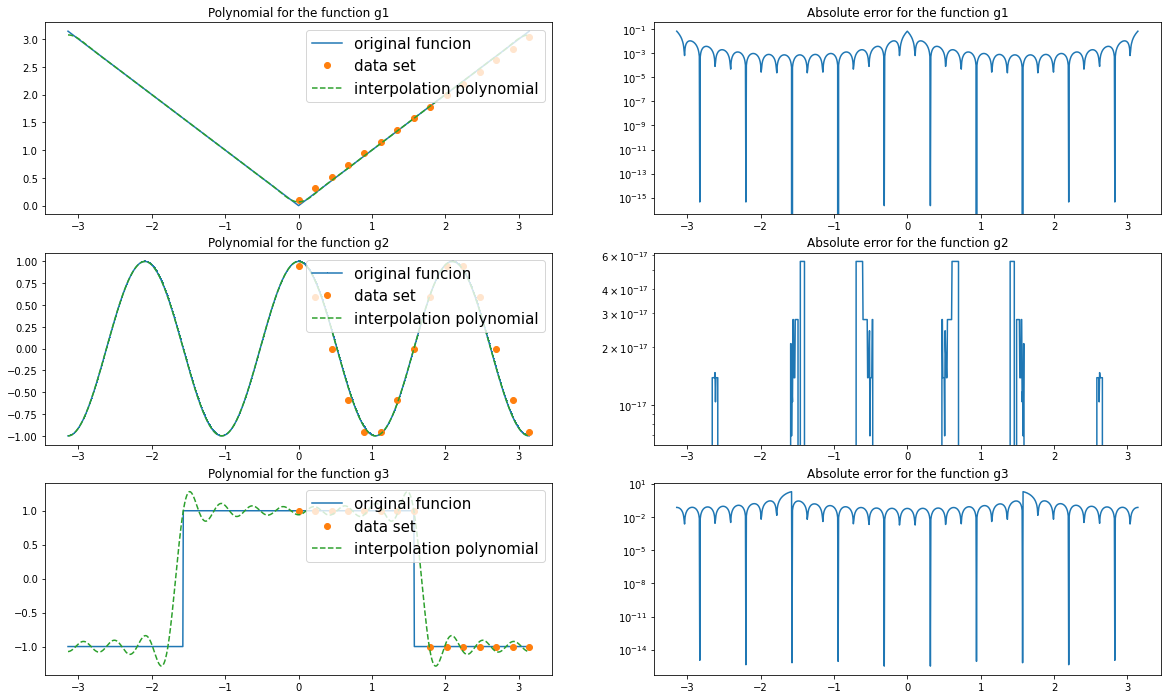

In [25]:
plt.figure(figsize=(20 , 12))
plt.subplot(3,2,1)
plt.plot(X_2, vals_g1, label='original funcion')
plt.plot(X, poly_g1, marker='o', linestyle='', label='data set')
plt.plot( X_2, poly_aprox_g1, '--', label='interpolation polynomial')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial for the function g1')
plt.yscale('linear')

plt.subplot(3,2,3)
plt.plot(X_2, vals_g2,  marker=',', label='original funcion')
plt.plot( X, poly_g2, marker='o', linestyle='', label='data set')
plt.plot( X_2, poly_aprox_g2, '--', label='interpolation polynomial')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial for the function g2')
plt.yscale('linear')

plt.subplot(3,2,5)
plt.plot(X_2, vals_g3, label='original funcion')
plt.plot( X, poly_g3, marker='o', linestyle='', label='data set')
plt.plot( X_2, poly_aprox_g3, '--', label='interpolation polynomial')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial for the function g3')

plt.subplot(3,2,2)
plt.plot(X_2, err_1)
plt.title(f'Absolute error for the function g1')
plt.yscale("log")

plt.subplot(3,2,4)
plt.plot(X_2, err_2)
plt.title(f'Absolute error for the function g2')
plt.yscale("log")

plt.subplot(3,2,6)
plt.plot(X_2, err_3)
plt.title(f'Absolute error for the function g3')
plt.yscale("log")

plt.show()

In the graphs above, we have evaluated 3, 2$\pi$-periodic even functions, namely $g1$, $g2$, and $g3$. All these functions were evaluated in a dataset with sample space of 30 points, whereas the original functions were plotted with a sample space of 1000 points.

<b> Procedure and explanation of the code </b>

- In the first cell, we have defined the functions $g1$, $g2$, and $g3$ explicitly. 

- In the subsequent cell, we have defined the algorithm to evaluate the matrix $A$ for the linear system defined before in the function poly_eval_A(). This function, as described, evaluates the matrix $A$ and the coefficients of the input function $f$ for each of the points in the length of the dataset (X), which is returned as a 1-D vector $\hat{f}$.

- In the next cell, we have defined the function evalTrigo_poly() which calculates the interpolation polynomial through the constants and the data set passed to it as arguments.

- In the third cell, we have two custom functions cos() and X_k() which are required to perform necessary computations to assist us in our code. Thereafter, we define two separate vectors X and X_2 which are datasets to evaluate the interpolating trigonometric polynomials and the original functions respectively. After doing necessary computations, we calculate the 1-D vectors poly_g1 and poly_g2 which are the approximated interpolating polynomial for the respective functions.

- In the fourth cell, we plot the three graphs in two columns each. In the first column, the graphs contain the original function, points from the data set, as well as the interpolating polynomial on a linear scale. In the second column, we have plotted the error between the original functions and the interpolating polynomial.

<b> Observations </b>

From the graphs, it can be observed that the interpolating trigonometric polynomials converge for functions g1 and g2 but not so clearly for 
the function g3. 

Essentially, the constants for approximating the trigonometric polynomial are considerably accurate (as can be seen from the second column) and hence method 1 is a reliable method to approximate a trigonometric interpolation polynomial for a 2$\pi$-periodic even function.

<a id='2.2.2'></a>
**<h3> 2.2.2: Method 2</h3>**

For our second method, we use the fact that the inverse of matrix A is given by the matrix:
$$ 
B = \frac {1}{N} 
\begin{pmatrix}
    cos(0X_0) & \cdots & cos(0X_{N-1}) \\
    \vdots & \ddots & \vdots \\
    cos((N-1)X_0) & \cdots & cos((N-1)X_{N-1}) \\
\end{pmatrix}
$$

We can use this information to compute the coefficients of the polynomial $P_N(f)$ in a more efficient way described below:
$$ A \cdot \hat{f} = f(X_k) \quad \quad$$
$$ A^{-1}\cdot A \cdot \hat{f} = A^{-1} \cdot f(X_k) \quad \quad$$
$$ \hat{f} = B \cdot f(X_k) $$

Fundamentally, computing the product of a matrix with a vector is an operation of the order $N^2$, while computing the solution from a linear equation is an operation that can best be achieved by an order of $N^{\log_2 7}$ and that too using only a galactic alogrithm. Essentialy, using the second method by employing the matrix B, we can approximate the coefficients of the polynomial for the function in a faster way. To implement this, we evaluate the matrix B and the vector $\hat{f_B}$ using the function <b>numpy.dot</b> which returns the product of two matrices. Then, we plot the coefficients of the polynomial and record our observations.

In [26]:
def poly_eval_B(fX_vals, N):
    """
    Computation of the matrix B using np.dot
    -----------------------
    Inputs: 
    fX_vals : the value of function f at X_k points (1D array with distinct entries)
    N : points to be evaluated
    
    Output:
    f_hat : The coefficients of the trigonometric interpolation polynomial (1D array having the same size as fX_vals)
    """
    # initializing matrix B
    B = [[] for i in range(N)] 
    
    for j in range(N):
        B[j] = [ cos( (j * X_k(k, N)) ) / N for k in range(N) ]

    return np.dot(B, fX_vals)

In [27]:
# assigning vector f_hat, matrix A, and interpolating polynomial for g1
f_hat_g1 = poly_eval_B(fX_vals_g1, len(X))
poly_g1_2 = [ np.sum(A_g1[i] * f_hat_g1) for i in range(len(X))]  
poly_aprox_g1 = evalTrigo_poly(f_hat_g1, X_2)     
err_1 =  [ np.abs(vals_g1[i] - poly_aprox_g1[i]) for i in range(len(X_2)) ]                                           

# assigning vector f_hat,  matrix A, and interpolating polynomial for g2
f_hat_g2 = poly_eval_B(fX_vals_g2, len(X))
poly_g2_2 = [ np.sum(A_g2[i] * f_hat_g2) for i in range(len(X))]
poly_aprox_g2 = evalTrigo_poly(f_hat_g2, X_2)
err_2 =  [ np.abs(vals_g2[i] - poly_aprox_g2[i]) for i in range(len(X_2))]  

# assigning vector f_hat,  matrix A, and interpolating polynomial for g2
f_hat_g3 = poly_eval_B(fX_vals_g3, len(X))
poly_g2_3 = [ np.sum(A_g3[i] * f_hat_g3) for i in range(len(X))]
poly_aprox_g2 = evalTrigo_poly(f_hat_g2, X_2)
err_3 =  [ np.abs(vals_g3[i] - poly_aprox_g3[i]) for i in range(len(X_2))]  

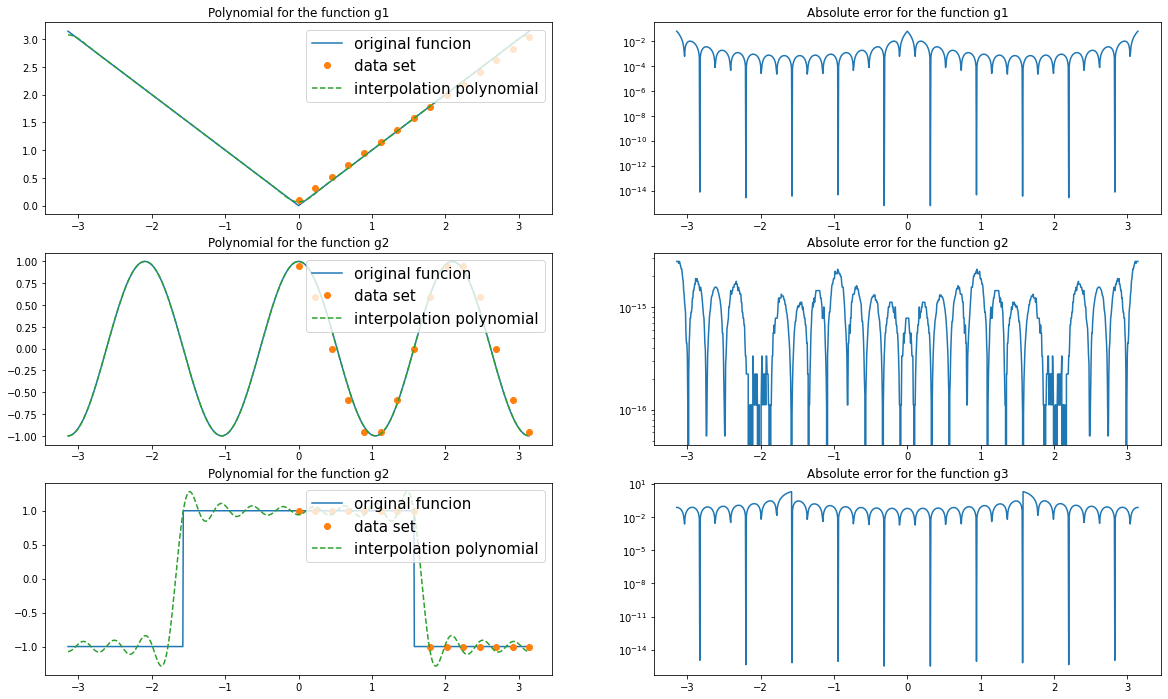

In [28]:
plt.figure(figsize=(20 , 12))
plt.subplot(3,2,1)
plt.plot(X_2, vals_g1, label='original funcion')
plt.plot(X, poly_g1_2,  marker='o', linestyle='', label='data set')
plt.plot( X_2, poly_aprox_g1, '--', label='interpolation polynomial')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial for the function g1')

plt.subplot(3,2,2)
plt.plot(X_2, err_1)
plt.title(f'Absolute error for the function g1')
plt.yscale("log")

plt.subplot(3,2,3)
plt.plot(X_2, vals_g2, label='original funcion')
plt.plot( X, poly_g2_2,  marker='o', linestyle='', label='data set')
plt.plot( X_2, poly_aprox_g2, '--', label='interpolation polynomial')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial for the function g2')

plt.subplot(3,2,4)
plt.plot(X_2, err_2)
plt.title(f'Absolute error for the function g2')
plt.yscale("log")

plt.subplot(3,2,5)
plt.plot(X_2, vals_g3, label='original funcion')
plt.plot( X, poly_g2_3,  marker='o', linestyle='', label='data set')
plt.plot( X_2, poly_aprox_g3, '--', label='interpolation polynomial')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial for the function g2')

plt.subplot(3,2,6)
plt.plot(X_2, err_3)
plt.title(f'Absolute error for the function g3')
plt.yscale("log")

plt.show()

<b> Procedure and explanation of the code </b>

- In the first cell, we have defined the algorithm to evaluate the matrix $B$ for the linear system (defined before) in the function poly_eval_B(). This function, as described, evaluates the matrix $B$ and the coefficients of the input function $f$ for each of the points in the length of the dataset (X), which is returned as a 1-D vector $\hat{f}$.

- In the second cell, we define two separate vectors X and X_2 which are datasets to evaluate the interpolating trigonometric polynomials and the original functions respectively. After doing necessary computations, we calculate the 1-D vectors poly_g1 and poly_g2 which are the approximated interpolating polynomial for the respective functions. For these vectors, we have used the values A_g1 and A_g2 which are the matrices A for functions g1 and g2 calculated in method 1. These are multiplied by the vector $\hat{f}$ to evaluate the interpolating trigonometric polynomial.

- In the third cell, we plot the graphs for all functions similarly to as was done in the previous subsection.

**Observations**

From the graphs, we obtain the same information from the ones plotted for method 1.Essentially, the interpolating polynomials approximate functions $g1$ and $g2$ really well but not so much for function $g3$. In fact, when we plot the difference in the results of the data sets for the three functions (for interpolation polynomials calculated separately from method 1 and 2) as shown in the cell below, the difference is observed to be practically negligible. This implies, that the constants calculated by method 2 are accurate and reliable. Hence, we have experimentally proven that B is actually the inverse of matrix A and our hypothesis is correct. Moreover, we have discovered a new and (for now) a theoretically faster method to evaluate the coefficients for our trigonometric interpolation polynomial.

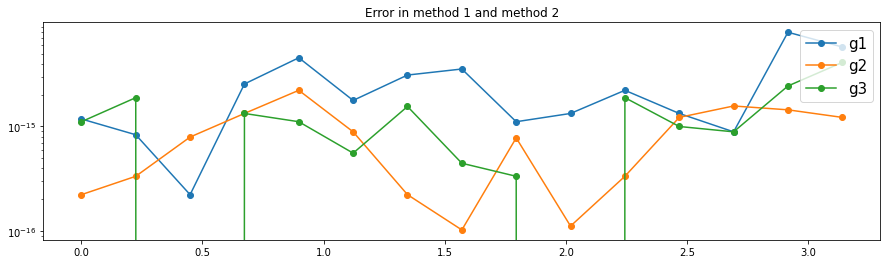

In [29]:
err_1 = [ np.abs(poly_g1[i] - poly_g1_2[i]) for i in range(len(X)) ]
err_2 = [ np.abs(poly_g2[i] - poly_g2_2[i]) for i in range(len(X)) ]
err_3 = [ np.abs(poly_g3[i] - poly_g2_3[i]) for i in range(len(X)) ]

plt.figure(figsize=(15 , 4))
plt.plot(X, err_1, marker = 'o', label='g1')
plt.plot(X, err_2, marker = 'o', label='g2')
plt.plot(X, err_3, marker = 'o', label='g3')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Error in method 1 and method 2')
plt.yscale('log')

<a id='2.2.3'></a>
**<h3> 2.2.3: Method 3</h3>**

For the third method, we use the Discrete Cosine Transform (DCT) to find the coefficients $\hat{f}$ by using <b>scipy.fftpack</b>. DCT corresponds go the map $f(X) \rightarrow \hat{f}$. It is also known that because of implementation differences in scipy, map B is given by $ B = \frac {1}{2N} dct$. 

In the implementation, the vector $\hat{f}$ is evaluated by performing DCT on the vector $f(X)$. Thereafter, the difference between the coefficients found using method 2 and method 3 is graphed to verify the accuracy of implementation of DCT. 

In [30]:
def DCT(fX_vals, N):  
    """
    Computation of the vector f_hat using DCT
    -----------------------
    Inputs: 
    fX_vals : the value of function f at X_k points (1D array with distinct entries)
    N : points to be evaluated
    
    Output:
    f_hat : The coefficients of the trigonometric interpolation polynomial (1D array having the same size as fX_vals)
    """
    return fftpack.dct(fX_vals) / (2 * N)

In [31]:
# assigning vector f_hat, matrix A, and interpolating polynomial for g1
f_hat_g1_DCT = DCT(fX_vals_g1, len(X))                                              

# assigning vector f_hat,  matrix A, and interpolating polynomial for g2
f_hat_g2_DCT = DCT(fX_vals_g2, len(X))

# assigning vector f_hat,  matrix A, and interpolating polynomial for g2
f_hat_g3_DCT = DCT(fX_vals_g3, len(X))

# calculate error in coefficients of the functions
err_coeff_g1 = [ np.abs(f_hat_g1_DCT[i] - f_hat_g1[i]) for i in range(len(X)) ]
err_coeff_g2 = [ np.abs(f_hat_g2_DCT[i] - f_hat_g2[i]) for i in range(len(X)) ]
err_coeff_g3 = [ np.abs(f_hat_g3_DCT[i] - f_hat_g3[i]) for i in range(len(X)) ]

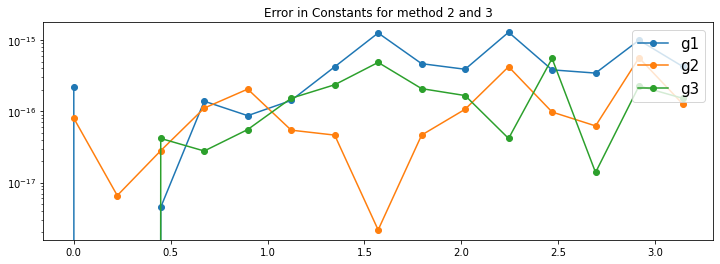

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(X, err_coeff_g1, marker = 'o', label='g1')
plt.plot(X, err_coeff_g2, marker = 'o', label='g2')
plt.plot(X, err_coeff_g3, marker = 'o', label='g3')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Error in Constants for method 2 and 3')
plt.yscale('log')

<b> Procedure and explanation of the code </b>

- In the first cell, we have defined the algorithm to evaluate $\hat{f_DCT}$ in the function DCT(). This function, as described, uses Discrete Cosine Theorem from scipy.fftpack and returns a 1-D vector $\hat{f_DCT}$ which has the coefficients for interpolating trigonometric polynomial.

- In the second cell, we calculate the 1-D vectors err_coeff_g1 and err_coeff_g2 which are the errors in the coefficients for the respective functions calculated using methods 2 and 3. For these vectors, we have used the values A_g1 and A_g2 which are the matrices A for functions g1 and g2 calculated in method 1.

- In the third cell, we plot both the error vectors on a logarithmic scale.

<b> Observations </b>

From the graph, we can observe that the error in the coefficients calculated from methods 2 and 3 are of the order of $1e-15$ and $1e-16$ which is practically negligible. This proves that the DCT method (method 3) is a reliable method to calculate the coefficients for the interpolation polynomial.

<a id='2.2.4'></a>
**<h3> 2.2.4: Run-time Comparisons</h3>**

In the cell below, the running time taken by each of the three different methods is compared using the function %timeit.

In [33]:
a = %timeit poly_eval_A(fX_vals_g1, len(X))
b = %timeit poly_eval_B(fX_vals_g1, len(X))
c = %timeit DCT(fX_vals_g1, len(X))

429 µs ± 8.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
428 µs ± 39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
19.4 µs ± 467 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


By comparing the time taken for the three different methods, the hypothesis that Method 3 is faster than Method 2 which is faster than Method 1, is proven correct.

<a id='2.3'></a>
**<h2> 2.3 Conclusion</h2>**

We can concluded from our analysis in section 2, that to determine the coeffcients of any trigonometric polynomial for approximating an even 2$\pi$-periodic function, the Discrete Cosine Transform (DCT) method should be preferred as it not only provides accurate results for evaluating the coefficients but also completes it much faster than the other two methods studied in subsections 2.2.1 and 2.2.2

<a  id='Section3'> </a>
**<h1> Section 3: Some Applications </h1>**

### Table of Contents

3.1 [Solving Differential Equations](#3.1)<br>
3.2 [Back to Polynomial Interpolation](#3.2)<br>
3.3 [Non-linear Operations](#3.3)<br>

<a id='3.1'></a>
**<h2> 3.1 Solving differential equations </h2>**

The Poisson equation is given by: 
$$-u''(x) = f(x)$$  $$u'(0) = u'(\pi) = 0$$ where $x \in (0,\pi)$. 

The function $u$ is unknown, the function $f$ is given with the boundary conditions where it is assumed that $f'(0) = f'(\pi) = 0$

<a id='3.1.1'></a>
**<h3> 3.1.1: Solving differential equations using Fourier series</h3>**

A fourier series in its raw form respresents a periodic function as a series of sinusoidals and cosinusoidals which are simple to evaluate individually and can be regrouped together for the original solution thanks to the superposition principle. 

Essentially, since the function f(x) is given, let us use a Fourier series to represent the nonhomogeneous equation using the boudary condition ($f'(0) = f'(\pi) = 0$). We define $$f(x) = a_0(f) + 2\sum_{n=1}^{N-1} a_n(f)cos(nx)$$
and assume that the solution is of the form given by: 
$$u(x) = \sum_{n=1}^{N-1} b_n(u)cos(nx)$$ 
Upon substitution of this series into the equation, we can solve the differential equations efficiently and this explains why it makes sense to solve Poisson equation using fourier series.

<a id='3.1.2'></a>
**<h3> 3.1.2: Condition on f</h3>**

When the Fourier series is used to solve the Poisson equation and as the function $f$ gets smoother, the error between the Fourier series and the function decreases. Since $f(x) = -u''(x)$, it is trivial to mention that the function $f$ is integrable. Hence, in order to define Fourier series, $f$ has to be a $2\pi$ periodic function. 

Now, we will discuss about the homogeneous and non-homogeneous equations. In this Possion differential equation, if $f(x) = 0$, it is a homogeneous equation. Otherwise, we need to find a particular solution. In order to find that, we assume the solution to be of the form given by:

$$u(x) = \sum_{n=1}^{N-1} b_n(u)cos(nx)$$

Thus, in conclusion, the function $f$ has to be a periodic function in order for the equation to have a particular solution using Fourier series. 

<a id='3.2'></a>
**<h2> 3.2 Back to Polynomial Interpolation </h2>**

Given a function $F(x) = \textrm{tanh}(20 \textrm{sin}(15x)) + 0.02e^{3x}\textrm{sin}(300x)$, a trigonometric polynomial needs to be approximated and constructed on the interval $I = [-1, 1]$ from many sample points $F(x_k)$.

To approximate the function $F: [-1,1] \to \mathbb{R}$ as a trigonometric polynomial, we rewrite it as the function $ f(x) = F(cos(x))$. Now, the function $f$ is a 2$\pi$-periodic even function on the interval $[-1, 1]$. Therefore, to evaluate the coefficients of the approximated polynomial $P_N(f)$, we can use DCT() method from section 2.2.3 on the funnction $f(X)$ and then plot its unique interpolation polynomial with respect to the original set of sample points using np.arccos().


In [34]:
def func(x):
    """
    Returns the value of the function described in section 3.2
    """
    return np.tanh(20*np.sin(15*x)) + (0.02 * np.sin(300*x) * np.exp(3*x))


# sample points
N = 1000

X = [ X_k(i, N) for i in range(N) ]
X_2 = np.linspace(-1, 1, 1001)

# calculating the function F(cos(x))
y = func(cos(X))

# Calculating the original function
func_orgnl = func(X_2)

# Calculating the coefficients for the interpolation polynomial of F(cos(x_))
f_hat_func = DCT((y), N)

# approximating the polynomial 
poly_aprox_px = evalTrigo_poly(f_hat_func, np.arccos(X_2))

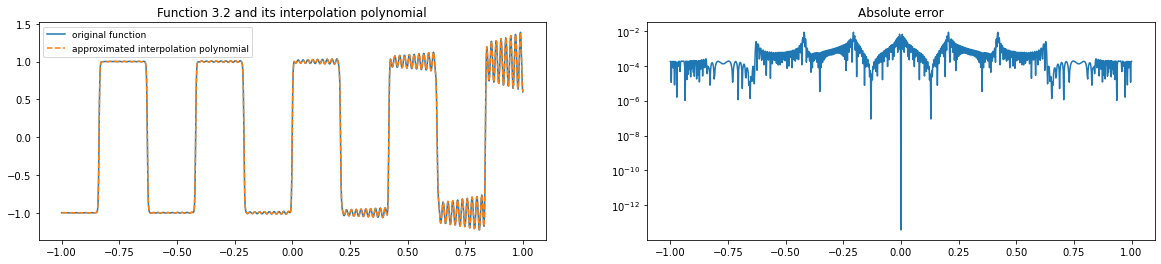

In [35]:
plt.figure(figsize=(20 , 4))
plt.subplot(121)
plt.plot(X_2, func_orgnl, label='original function')
plt.plot(X_2, poly_aprox_px, '--', label='approximated interpolation polynomial')
plt.legend(fontsize='9', loc='upper left')
plt.title(f'Function 3.2 and its interpolation polynomial')

plt.subplot(122)
plt.plot(X_2, np.abs(func_orgnl - poly_aprox_px))
plt.title(f'Absolute error')
plt.yscale('log')

plt.style.use('default')
plt.show()

**<h4> Observations </h4>**

* In the first graph, the function $F(x) = \textrm{tanh}(20 \textrm{sin}(15x)) + 0.02e^{3x}\textrm{sin}(300x)$ has been accurately approximated by the trigonometric interpolation polynomial $poly$ _ $aprox$ _ $px$, a claim strongly supported by the second graph where the error between the original function and the interpolation polynomial oscillates between $1e-1$ and $1e-5$. 

* Essentially, the code is calculating the coefficients of the function $F$ using chebyshev nodes and while plotting the function using polynomial approxmation, it does so on the interval $ [-\pi, \pi] $ by using the mapping $x \to arccos(x)$. Effectively, the mapping $x \to cos(n*arccos(x))$ has been used overall which is in fact a chebyshev polynomial of the first kind.

* In conclusion, one can hypothesize that when enough values are sampled for any continuous function f(x), it is possible to interpolate it using a unique trigonometric polynomial by converting the original function into a 2$\pi$-periodic even function.

<a id='3.3'></a>
**<h2> 3.3 Nonlinear Operations </h2>**

## Table of contents

3.3.1 [Product of Trigonometric Polynomials](#3.3.1)<br>
3.3.2 [Multiplying two Trigonometric Polynomials](#3.3.2)<br>
3.3.3 [Inverse of a Trigonometric Polynomials](#3.3.3)<br>
3.3.4 [Image Compression](#3.3.4)<br>

<a id='3.3.1'></a>
**<h3> 3.3.1: Product of trigonometric polynomials</h3><br>**

Let P and Q be two trigonometric polynomials given by:
$$P(x) = \hat{P_0} + 2 \sum_{n = 1}^{N-1} \hat{P_n}cos(nx) \quad \textrm{and} \quad Q(x) = \hat{Q_0} + 2 \sum_{n = 1}^{N-1} \hat{Q_n}cos(nx)$$

Their product is given by another trigonometric polynomial $R$ where, $R = PQ$, and coefficients of $R$ are given by:<br>
$$\hat{R}_n = \sum_{m = n-N+1}^{N-1} \hat{P}_{|m|}\hat{Q}_{|n - m|} $$

This formula can be explained either by using the property $\;2\;cos(A)\;cos(B) = cos(A+B) + cos(A-B)$ or by using Euler's formula. Here, we use the latter and write the given polynomials as: 

$$P(x) = \hat{P_0} + 2 \sum_{n = 1}^{N-1}\frac{1}{2}\hat{P_n}(e^{in} + e^{-in}) \quad \textrm{and} \quad Q(x) = \hat{Q_0} + 2 \sum_{n = 1}^{N-1} \frac{1}{2} \hat{Q_n}(e^{in} + e^{-in})$$

$$or$$ 
 
$$P(x) = \hat{P_0} + \sum_{n = 1}^{N-1} \hat{P_n}(e^{in} + e^{-in}) \quad \textrm{and} \quad Q(x) = \hat{Q_0} + \sum_{n = 1}^{N-1} \hat{Q_n}(e^{in} + e^{-in})$$

While multiplying these two polynomials, it is clearly observed that each variable of the m-th degree for $\hat{R}_m$ can only be produced when two specific pair of terms ($\hat{P}_{|r|}e^{i|r|}$, $\hat{Q}_{|m-r|}e^{i|m-r|}$) and ($\hat{P}_{|r|}e^{-i|r|}$, $\hat{Q}_{|m-r|}e^{-i|m-r|}$) are multiplied. This essentially justifies the formula given below where the indices of the variables are also of the form $|r|$ and $|r-m|$:
$$\hat{R}_n = \sum_{m = n-N+1}^{N-1} \hat{P}_{|m|}\hat{Q}_{|n - m|} $$

<a id='3.3.2'></a>
**<h3> 3.3.2: Multiplying two trigonometric polynomials</h3>**

To obtain the first N coefficients of the product of two trigonometric polynomials $\hat{R}$, we can use the equation $
\hat{R} = M_{\hat{Q}} \hat{P} $, where $ M_{\hat{Q}} $ is: <br><br>
$$
\\ 
M_{\hat{Q}} = 
\underbrace{
\begin{pmatrix} 
\hat{Q}_0 & \hat{Q}_1 & \cdots & \hat{Q}_{N-1} \\ 
\hat{Q}_1 & \hat{Q}_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\ 
\hat{Q}_{N-1} & 0 & \cdots & 0 
\end{pmatrix}}_{\text{ $H_{\hat{Q}}$}} +
\underbrace{
\begin{pmatrix} 
\hat{Q}_0 & \hat{Q}_1 & \cdots & \hat{Q}_{N-1} \\ 
\hat{Q}_1 & \hat{Q}_0 & \cdots & \hat{Q}_{N-2} \\
\vdots & \vdots & \ddots & \vdots \\ 
\hat{Q}_{N-1} & \hat{Q}_{N-2}  & \cdots & \hat{Q}_0 
\end{pmatrix}}_{\text{ $T_{\hat{Q}}$}} - 
\begin{pmatrix} 
\hat{Q}_0 & 0 & \cdots & 0 \\ 
\hat{Q}_1 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\ 
\hat{Q}_{N-1} & 0 & \cdots & 0
\end{pmatrix}
$$


In the cell below, the function prod_coeff() implements the algorithm defined above. The function calc_poly() calculates the value of the trigonometric polynomial whose coefficients are passed to it at the point it has to be evaluated on. For the polynomial coefficeints, we use the vectors f_hat_g1_DCT and f_hat_g2_DCT (coefficients for functions g1 and g2 respectively) from section 2.2.3


In [36]:
def prod_coeff(P, Q):
    """
    Computation of the vector R
    -----------------------
    Inputs: 
    Q : vector of coefficients for 1st polynomial
    P : vector of coefficients for 2nd polynomial
    
    Output:
    R : vector of coefficients for product polynomial
    """
    H_Q = scipy.linalg.hankel(Q)
    T_Q = scipy.linalg.toeplitz(Q)
    extra_Q = [[Q[j] if i == 0 else 0 for i in range(len(Q))] for j in range(len(Q))]

    M_Q = H_Q + T_Q - extra_Q

    return np.dot(M_Q, P)


def calc_poly(vector, x):
    """
    Computation of the vector R
    -----------------------
    Inputs: 
    Vector : vector of coefficients for the polynomial to be determined
    x : The value at which the polynomial has to be determined
    
    Output:
    Poly : Value of the trigonometric polynomial
    """
    n = len(vector)
    val = vector[0]

    for i in range(1, n):
      val += 2*vector[i]*cos(i*x)

    return val

In [37]:
# Point to be evaluated
X = [random.uniform(0,10) for i in range(30)]

# initializing polynomial P
P = [ calc_poly(f_hat_g1_DCT, i) for i in X ]

# initializing polynomial Q
Q = [ calc_poly(f_hat_g2_DCT, i) for i in X ]

# calculating R using Hankel matrices
R_hat = prod_coeff(f_hat_g1_DCT, f_hat_g2_DCT)
R_hankel = [ calc_poly(R_hat, i) for i in X ]

# calculating R by brute force
R_brute = [ P[i]*Q[i] for i in range(len(X)) ]

err = [ np.abs(R_brute[i] - R_hankel[i]) for i in range(len(X)) ]
tabk = np.arange(0, len(X))

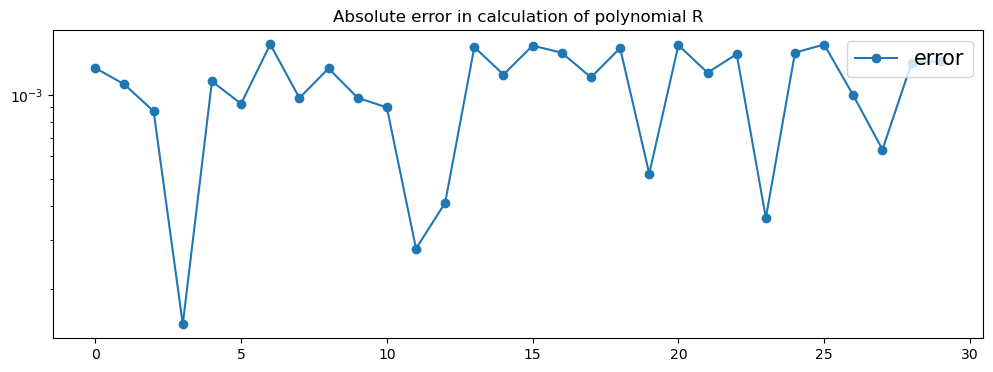

In [38]:
plt.figure(figsize=(12 , 4))
plt.plot(tabk, err, marker = 'o', label='error')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Absolute error in calculation of polynomial R')
plt.yscale('log')

<b> Observations </b>

After implementing the algorithm suggested above and using brute force to calculate the product of two trigonometric polynomials, we realise that the suggested algorithm calculates the value of the polynomial with high precision as the absolute error between the values calcuated using the two methods is of the order of $1e-4$. 

This error is a direct result of the truncation errors as the polynomial R, in the vector $R_{hankel}$, is calculated only until degree $N-1$ while theoretically it is a polynomial of degree $2N-2$. Whereas in the vector $R_{brute}$, the polynomial R is calculated precisely without any truncation error (assuming we ignore roundoff errors of machine numbers).

<a id='3.3.3'></a>
**<h3> 3.3.3: Inverse of a Trigonometric Polynomial</h3>**

Given the coefficients $\hat{P}$ of a trigonometric polynomial $P$ we need to determine trigonometric coefficients $\hat{Q}$ such that the corresponding function $Q$ satisfies $Q(x) \approx \frac{1}{P(x)}$.

In the code below, we will use the vector $f\_hat\_g1\_DCT$  (coefficients of function g1 from section 2.2.1) and try to evaluate $\hat{Q}$ which can potentially approximate the function $\frac{1}{P(x)}$.

Our method will be to evaluate the value of $P(x)$ at a certain point $x$ and then use it to approximate the value of the coefficients $\hat{Q}$ by multiplying with the transpose of the matrix of variables $1, 2*cos(x), ..., 2*cos((N-1)x)$

In [39]:
def aux_func(vect, x):
    """
    Computes the value of a trigonometric polynomial at the point x
    """
    return np.sum([ val if ind == 0 else 2*np.cos(ind*x)*val for ind, val in enumerate(vect) ])

def coeff_inv(x, N, vect):
    """
    Computing coefficeints of the inverse trigonometric polynomial
    -----------------------
    Inputs: 
    x    : point where the polynomial needs to be evaluated
    N    : number of coefficients
    vect : vector of coefficients of the given polynomial
    
    Output:
    Q_hat : Vector of trigonometric coefficients Q_hat
    P_X   : Value of the polynomial P(x)
    """
    B = [ (np.cos(i*x)) / (N-1) for i in range(N) ]
    P_X = aux_func(vect, x)

    Q_hat = [ i / P_X for i in B ]

    return Q_hat, P_X

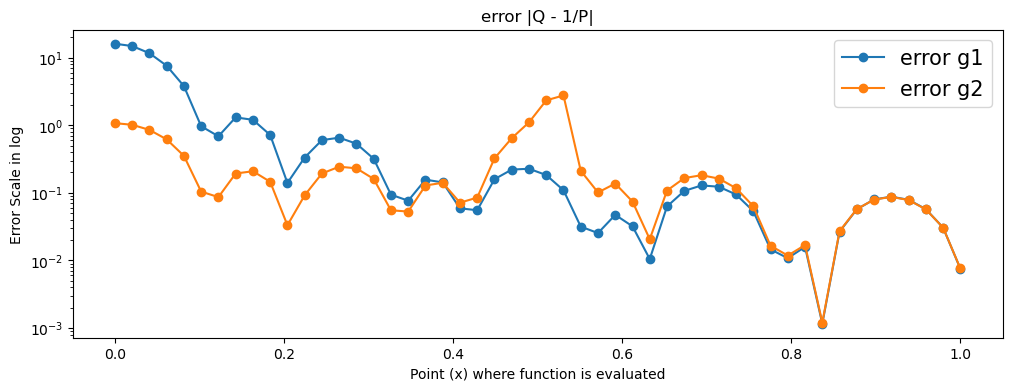

In [40]:
x = np.linspace(0,1,50)

# calculating Q_hat and P_X for every X in x for the function g1
temp = [ coeff_inv(i, len(f_hat_g1_DCT), f_hat_g1_DCT) for i in x] 
Q_X = [ aux_func(temp[ind][0], val) for ind, val in enumerate(x) ]

err_1 = [ np.abs(Q_X[i] - 1/temp[i][1]) for i in range(len(x))]

# calculating Q_hat and P_X for every X in x for the function g2
temp = [ coeff_inv(i, len(f_hat_g2_DCT), f_hat_g2_DCT) for i in x] 
Q_X = [ aux_func(temp[ind][0], val) for ind, val in enumerate(x) ]

err_2 = [ np.abs(Q_X[i] - 1/temp[i][1]) for i in range(len(x))]

plt.figure(figsize=(12 , 4))
plt.plot(x, err_1, marker = 'o', label='error g1')
plt.plot(x, err_2, marker = 'o', label='error g2')
plt.xlabel('Point (x) where function is evaluated')
plt.ylabel('Error Scale in log')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'error |Q - 1/P|')
plt.yscale('log')

**<h4> Observations </h4>**

Here, we have plotted the graph of the absolute error between the product of the polynomial P and its inverse Q and 1. From the graph, it is apparent that the vector $\hat{Q}$ has been approximated quite accurately as the error is of order $1e-2$. 

Hence, we have found a method to calculate a polynomial function that well approximates the inverse of a given trigonometric polynomial.

<a id='3.3.4'></a>
**<h3> 3.3.4: Image Compression</h3>**

The mapping $\hat{P} \to P(x)$ and the mapping $ P(x) \to \hat{P} $ are powerful tools with numerous applications. Here we will apply these two mappings to understand how image compression works. For simplicity, we will work with a grayscale image rather than RGB.

Fundamentally, a grayscale image is an $ N \times N$ matrix with numerical values (ranging from 0 - 255) in each cell that correspond to a certain luminosity of the corresponding pixel in the image grid. Here, a 2D (DCT) discrete fourier transform (the mapping $ P(x) \to \hat{P} $) can be applied on the grid such that these numerical values get converted into fourier coefficients. As a result, the new output matrix then has the values of the fourier coefficients corresponding to the respective cosine waves. This is well represented in the image below where the top left corner of the matrix has a low frequency and a high coefficient while the bottom right corners have higher frequencies with smaller coefficients.<br>

<img src="dct-matrix.png" height='500' width='500' >

<br>

As can be observed, the difference between the high and low coefficients is so large that the smaller coefficients have negligible effect on the total output of the original numerical value of the image. Hence, these high frequency small coefficients can be set to zero to save data while at the same time avoiding any major loss of quality in the original image. Moreover, to retrieve the image back, a 2D (iDCT) inverse Discrete Cosine Theorem (or the mapping $\hat{P} \to P(x)$) can be applied which principally returns a matrix with integers in the range 0-255 that can then be used to reproduce the original image although in a lower quality.

Mathematically 2D DCT and iDCT are represented as given below:


\begin{eqnarray}
F(i, j) & = & \frac{1}{\sqrt{2N}} \textrm{K}(i) \textrm{K}(j)\sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f(x, y) \cos\left( \frac{ (2x+1)i\pi}{2N}\right) \cos\left( \frac{ (2y+1)j\pi}{2N}\right) \nonumber \\
\end{eqnarray}

where $\textrm{K}(x) = \frac{1}{\sqrt{2}}$ if $x$ is $0$ else $1$

\begin{eqnarray}
f(i, j) & = & \frac{1}{\sqrt{2N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} F(i, j) \textrm{K}(i) \textrm{K}(j) \cos\left( \frac{ (2x+1)i\pi}{2N}\right) \cos\left( \frac{ (2y+1)j\pi}{2N}\right) \nonumber \\
\end{eqnarray}

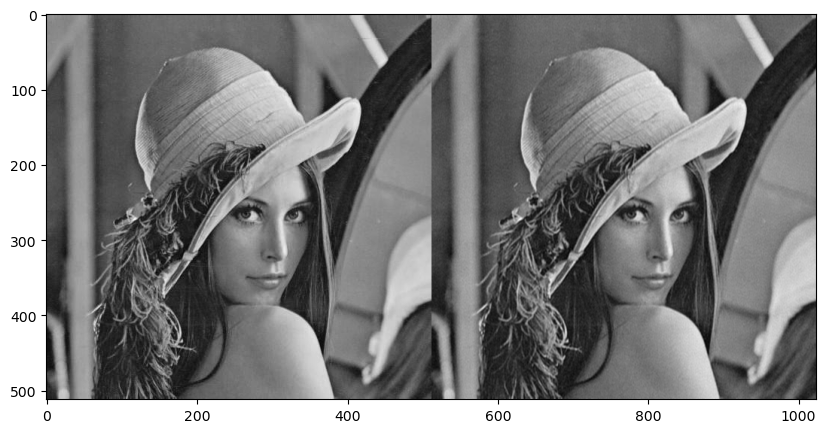

In [74]:
from PIL import Image
from numpy import asarray
from scipy.fftpack import dct 
from scipy.fftpack import idct 

# load the image
image = Image.open('abc.png')

# implementing 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implementing 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')   

# converting image into numpy array
data = asarray(image)

A = dct2(data)

# Setting frequencies <= 10 to zero
A[np.abs(A) <= 10] = 0

B = idct2(A)

img_dct = Image.fromarray(B)
img_dct = img_dct.convert('L')

img = img_dct.save('cde.png')

plt.figure(figsize = (20,5))
plt.imshow( np.hstack( (image, B) ) ,cmap='gray')

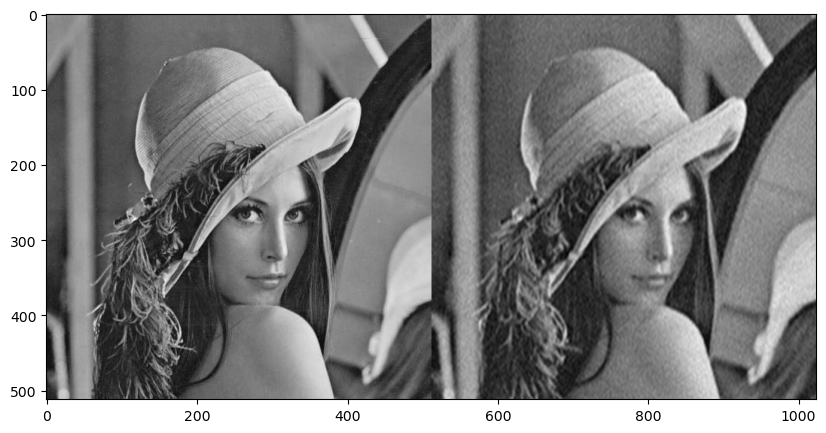

In [75]:
# Setting frequencies <=40 to zero
A[np.abs(A) <= 40] = 0

B = idct2(A)

img_dct = Image.fromarray(B)
img_dct = img_dct.convert('L')

img = img_dct.save('cde2.png')

plt.figure(figsize = (20,5))
plt.imshow( np.hstack( (image, B) ) ,cmap='gray')

**<h4> Observations </h4>**

In the code cell, we have implemented the 2D DCT and iDCT methods on a certain image using PIL (Python Imaging Library) for two separate degrees of compressions. In the first block, we have deleted frequencies <= 10 while in the second block we delete the frequencies <= 40. Thereafter, we plot the images on the same axes to directly compare the original and the compressed image for better observations.

From these image plots, one can comfortably agree that in the first block, the compressed image retains comparitively high levels of image quality as compared to the original image. Hence, one can argue that images should not be compressed too much so that they do not lose their quality as is seen in the image in the second block where the image quality is much worse and fine details have been blurred out. 

This argument, though, can be countered by observing that as the new files are saved in the folder, we can compare their sizes with the original file and see that although the original file is 158kb, the first compressed image is 137kb heavy, while the second compressed image is only 121kb in size. Hence, if the images are needed only for archiving purposes then the second compressed image has more importance as it takes less space but still has good enough quality for someone to recognize the person and other objects in the image.

Essentially, in this subsection, we have observed how we can use DCT and iDCT to compress the size of a grayscale image. The same method can be applied to a RGB image where initially, the image would have to be separated into its three fundamental channels, then each of the channels would have to be compressed and then merged back together to obtain the final compressed image in RGB.